Reddit comments EDA
1. Setting
2. data load, pre-processing
3. Sentiment EDA using VADER
4. Sentiment EDA using Bert
5. EDA between sentiment and price


# Setting

In [ ]:
# try:
#   import colab
#   !pip install --upgrade pip
# except:
#   pass

In [ ]:
# print('Installing TensorFlow Data Validation')
# !pip install --upgrade 'tensorflow_data_validation[visualization]<2'
!pip install vaderSentiment
!pip install pysentimiento

     |████████████████████████████████| 125 kB 7.2 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4254, in parseImpl
    ret = e._parse(instring, loc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 1683, in _parseNoCache
    loc, tokens = self.parseImpl(instring, preloc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4462, in parseImpl
    return self.expr._parse(instring

In [ ]:
import tensorflow as tf

# import pkg_resources
# import importlib
# importlib.reload(pkg_resources)
# import tensorflow_data_validation as tfdv
# print('TF version:', tf.__version__)
# print('TFDV version:', tfdv.version.__version__)

from google.colab import drive
import re
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
from datetime import datetime, timedelta

from transformers import pipeline
from pysentimiento import create_analyzer

from tqdm.notebook import tqdm
import pickle
import time

ModuleNotFoundError: ignored

In [ ]:
drive.mount('/content/drive')
path_vader = '/usr/local/lib/python3.7/dist-packages/vaderSentiment/'
path_capstone = '/content/drive/MyDrive/Colab Notebooks/capstone/data/'
print(os.listdir(path_vader))
print(os.listdir(path_capstone))

#lexicon update
shutil.copy(f'{path_capstone}emoji_utf8_lexicon.txt', f'{path_vader}emoji_utf8_lexiconss.txt')
shutil.copy(f'{path_capstone}vader_lexicon_v3.txt', f'{path_vader}vader_lexicon.txt')

analyzer = SentimentIntensityAnalyzer()#vader analyzer
analyzer_bert = create_analyzer(task="sentiment", lang="en")#bert analyzer

# comment count

### load comment data

In [ ]:
start = '2018-01-02'
end = '2022-02-28'

df_btc = pd.read_csv(f'{path_capstone}data_final_bitcoin.csv', index_col=0)
df_btc = df_btc.loc[:,start:end]
df_btc.fillna(0, inplace=True)

df_btc_top = pd.read_csv(f'{path_capstone}top_comment_bitcoin_cl.csv', index_col=0)
df_btc_top = df_btc_top.loc[:,start:end]
df_btc_top.fillna(0, inplace=True)

df_btc_second = pd.read_csv(f'{path_capstone}second_comment_bitcoin_cl.csv', index_col=0)
df_btc_second = df_btc_second.loc[:,start:end]
df_btc_second.fillna(0, inplace=True)

df_crypto_top = pd.read_csv(f'{path_capstone}top_comment_crypto_cl.csv', index_col=0)
df_crypto_top = df_crypto_top.loc[:,start:end]
df_crypto_top.fillna(0, inplace=True)

df_btc.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-09,2018-01-10,2018-01-11,2018-01-12,...,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28
0,"""Ten years in, nobody has come up with a use f...",2018 is gonna be a good year.,News about rockets must be check http://al...,10 hours for a transfer to binance and countin...,17.36k as of right now :),***DON'T PANIC ON COINMARKETCAP!***\n\nThey ju...,.. There ARE numerous teams working on infrast...,!,Special thanks to everyone selling me bitcoin...,Do not sell for a loss...either hold or buy more.,...,$ 25K,Username checks out,!LNTIP 1024,*prepares his submarine*,"""Its time to buy when there's blood on the str...",$8m short just got nuked. Some real spice today.,"""It is no coincidence that the century of tota...",Agreed. But when.,*$500K next year.,$30k to $50k is the new $5k to $10k range
1,"14,666 yeaaaaah :D","3 weeks, still waiting...",5k,100% agree on this one!,17k-18k then 20k by end of the week,2018 will be big for Bitcoin!,11k...,!,17,Four times of whatever the price of one bitcoi...,...,100% BTC. No stonks.,"""$320k so far""\n\n-Homer Simpson","$38,000 is the new $3,800",30k coming,15 times a day are rookie numbers.,*I didn't hear a bell* meme,"""You'll be down half your net worth in three m...","And in parallel, a shite FUD piece on energy use.",4.0 million,*Breaking*: Bitcoin is the hardest money on ea...
2,15k we made itt!!!!!!!!!!!!!,3 weeks. still waiting.,A digital currency.,100% per day! Every day! You must be a trading...,"Absolutely possible, it‘s not like those guys ...",>I believe its good time to buy now\n\n,15k for me...,"""2018 will be a great year for crypto"" they sa...",All this FUD made me hungry,Here we are. Friday again.\nTOO THE MOOOOOON!!...,...,100k by the end of the year.,"""Superb reporter"" sauce sounds like Grey Poupon",*Pution*,"A day like this may never come. Nobody knows, ...",29k mh guess\n\nI'm happy to be wrong for once!,2 thoughts:\n\nFCK Putin\n\nFCK Xi\n\nHODL!,50k bound !!!!!!,"At the worst days, pray for Ukraine that thing...",713 represent playa!,*Oh wise prophet…*
3,"2-4 business days, I think. That can be 7 or m...",Any idea if this site is legit place to buy ha...,Above 15k at least it seems,16k again baby!,Ate that wall hella fast,BTC on discount before liftoff!!!! Buy buy buy,35k. Shot in the dark.,"*turns on fan, vomit flys back in your face*",And now your watch begins,I think they will face no consequences for it ...,...,25% BTC 75% stocks.,1 RedCoin = 1 RedCoin,*turn around... every now and then I dip a lit...,Another 100 million sats off the market 🔥🚀,40 and holding would feel good.,"200WMA is getting higher, i hope we never ret...","50k would be nice, but i dont see that happeni...",BTC to $300k.,"Always have been, and the people holding it ar...",*This time* it's never going below $40k again
4,Chart Theory is useless. Nobody knows.,Been waiting about a month lmao good luck,Bitcoin Storm damn,17k incoming !!!,Back above 17k,Because I bought $50 last night.,> When will bitcoin cross $20 k\n\nFebruary\n\...,*vomits*,"Assuming 12900 is the low for today, BTC is up...",I would say 1. And 2. Are good options,...,40k stable coin,10 k is the flag amount,.25%,Ban hammer comin’ for you,"A large number of Ukrainians us Bitcoin, turn ...",Ain't so bad! - Rocky Balboa,A major crash was when it went from 18 to 3 fo...,Better to just keep a hodl on just whatever yo...,And the winner is Bitcoin.,1 BTC = 3.2 milllion rubles


## count daily comment number

In [ ]:
def count_text_num(df):#count daily comment num
  day_cnt = []
  for i in range(len(df.columns)):
    cnt = 0
    for j in range(len(df)):
      text = df.iloc[j,i]
      if text =='[deleted]' or text == 0: continue #NaN, [deleted]되있는 문장 스킵
      cnt +=1
    if cnt==0:
      print(f'{df.columns[i]}<- comment 0개')
    day_cnt.append(cnt)
  return day_cnt

In [ ]:
btc_cnt = count_text_num(df_btc)
btc_cnt_top = count_text_num(df_btc_top)
btc_cnt_second = count_text_num(df_btc_second)
crypto_cnt_top = count_text_num(df_crypto_top)

2018-09-23<- comment 0개
2018-09-23<- comment 0개
2018-11-01<- comment 0개
2019-11-03<- comment 0개
2020-10-07<- comment 0개
2018-09-23<- comment 0개
2018-12-29<- comment 0개
2020-04-13<- comment 0개
2019-05-22<- comment 0개


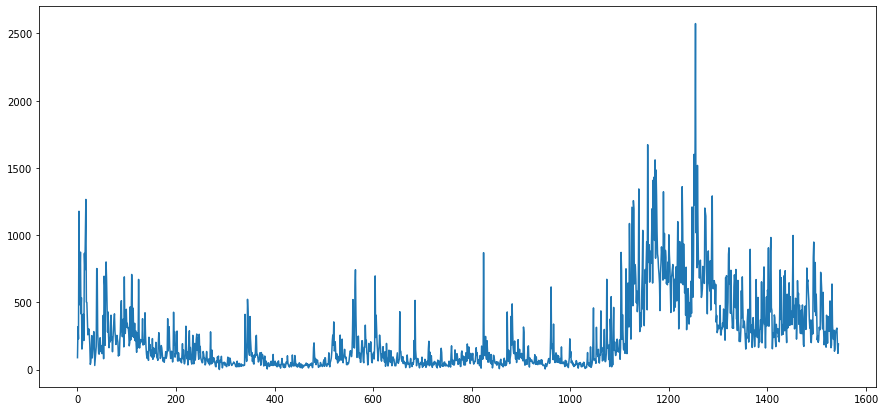

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(btc_cnt)

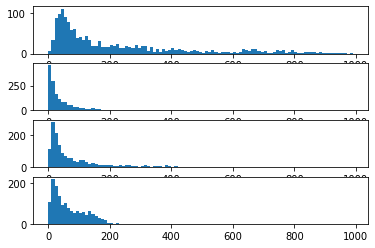

In [ ]:
plt.subplot(4, 1, 1)
plt.hist(btc_cnt, bins= range(0,1000,10))
plt.subplot(4, 1, 2)
plt.hist(btc_cnt_top, bins= range(0,1000,10))
plt.subplot(4, 1, 3)
plt.hist(btc_cnt_second, bins= range(0,1000,10))
plt.subplot(4, 1, 4)
plt.hist(crypto_cnt_top, bins= range(0,1000,10))

plt.show()

# sentiment EDA

### def

In [ ]:
def sent(x):#vader tri-class
    if x > 0:
        return 'positive'
    elif x == 0:
        return 'neutral'
    else:
        return 'negative'

def sentiment(sentence):#bert tri-class
    if sentence == 'pos':
        return 'positive'
    elif sentence == 'neg':
        return 'negative'
    else :
        return 'neutral'        
def sentiment_bi(probas):#bert bi-class
    if probas['POS'] > probas['NEG']:
        return 'positive'
    else:
        return 'negative'

In [ ]:
def filtering(series): #text filtering
  cleaned = []
  for text in series: 
    if text =='[deleted]' or text == 0: 
      continue #NaN, [deleted]되있는 문장 스킵
    if re.match('http', text) or text.find('!gif') != -1:
      continue
    length = len(text.split())#20단어 이상 문장들, 물음표로 끝나는 문장 제거
    if length >20 or text[-1]=='?': 
      # print('long sentence and question mark')
      continue
    cleaned.append(text)
  return cleaned

In [ ]:
#감성점수 비율 계산
def ratio(li):
  neu = 0
  pos = 0
  neg = 0
  for s in li:
    if s == 'neutral':
      neu += 1
    elif s== 'positive':
      pos += 1
    else:
      neg += 1
  total = pos + neu + neg
  if total!=0:
    return [pos/total, neu/total, neg/total]
  else:
    return [0,0,0]

In [ ]:
def make_day_score(df):
  day = []
  date = []
  for i in range(1,len(df.columns)):
    cleaned = filtering(df.iloc[:,i])
    date.append(df.columns[i].replace('-',''))
    sentiments = []
    compounds = []
    for text in cleaned:# 정제된 데이터에서 긍/중/부 판단
      comp = analyzer.polarity_scores(text)['compound']
      sentiments.append(sent(comp))
      compounds.append(comp)
    sent_features = ratio(sentiments)
    sent_features.append(np.mean(compounds))
    sent_features.append(np.var(compounds))
    day.append(sent_features)
  day = pd.DataFrame(day, columns=['pos', 'neu', 'neg', 'mean', 'var'])
  day['day'] = date
  for i in range(len(day)):
    day.loc[i,'day'] = datetime.strptime(day.loc[i,'day'], '20%y%m%d')
  day.set_index('day', inplace =True)
  return day


In [ ]:
def make_day_score_bert(df):
  day = []
  date = []
  for i in tqdm(range(1,len(df.columns))):
    cleaned = filtering(df.iloc[:,i])
    date.append(df.columns[i].replace('-',''))
    sentiments = []
    for text in cleaned:# 정제된 데이터에서 긍/중/부 판단
      # sentiments.append(sentiment_bi(analyzer_bert.predict(text).probas))
      sentiments.append(sentiment(analyzer_bert.predict(text).output.lower()))
    day.append(ratio(sentiments))
  day = pd.DataFrame(day, columns=['pos', 'neu','neg'])
  day['day'] = date
  for i in range(len(day)):
    day.loc[i,'day'] = datetime.strptime(day.loc[i,'day'], '20%y%m%d')
  day.set_index('day', inplace =True)
  return day


In [ ]:
def is_it_neu(df):
  neu_list = []
  for i in range(1,200):
    cleaned = filtering(df.iloc[:,i])
    for text in cleaned:
      a = analyzer.polarity_scores(text)
      if sorted(a.items(), key = lambda x: -x[1])[0][0] == 'neu':
        neu_list.append(text)
  neu_df = pd.DataFrame({'neu': neu_list})
  return neu_df
    
# neu_df = is_it_neu(df_btc_top)
# neu_df.to_csv(f'{path_capstone}neutral_sentence.csv')
# neu_df

In [ ]:
def make_day_score(df):
  day = []
  date = []
  for i in range(1,len(df.columns)):
    cleaned = filtering(df.iloc[:,i])
    date.append(df.columns[i].replace('-',''))
    sentiments = []
    compounds = []
    for text in cleaned:# 정제된 데이터에서 긍/중/부 판단
      comp = analyzer.polarity_scores(text)['compound']
      sentiments.append(sent(comp))
      compounds.append(comp)
    sent_features = ratio(sentiments)
    sent_features.append(np.mean(compounds))
    sent_features.append(np.var(compounds))
    day.append(sent_features)
  day = pd.DataFrame(day, columns=['pos', 'neu', 'neg', 'mean', 'var'])
  day['day'] = date
  for i in range(len(day)):
    day.loc[i,'day'] = datetime.strptime(day.loc[i,'day'], '20%y%m%d')
  day.set_index('day', inplace =True)
  return day


### sentiment distribution

Bert 가 Vader보다 수백배 느리다 약 2시간 소요

In [ ]:
sent_btc = make_day_score(df_btc)
sent_btc_top = make_day_score(df_btc_top)
sent_btc_second = make_day_score(df_btc_second)

sent_crypto_top =  make_day_score(df_crypto_top)

print(sent_btc.describe())
print(sent_btc_top.describe())
print(sent_btc_second.describe())
print(sent_crypto_top.describe())

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


               pos          neu          neg         mean          var
count  1505.000000  1505.000000  1505.000000  1504.000000  1504.000000
mean      0.494527     0.253109     0.251700     0.140623     0.177896
std       0.092297     0.087595     0.081771     0.080819     0.039302
min       0.000000     0.000000     0.000000    -0.301409     0.003415
25%       0.448718     0.201970     0.210046     0.095355     0.157862
50%       0.497608     0.244898     0.253846     0.139989     0.182571
75%       0.542484     0.291193     0.296296     0.183769     0.201069
max       1.000000     0.769231     0.818182     0.591825     0.469331
               pos          neu          neg         mean          var
count  1505.000000  1505.000000  1505.000000  1501.000000  1501.000000
mean      0.539594     0.200927     0.256821     0.178926     0.192767
std       0.168260     0.141640     0.139850     0.150748     0.075342
min       0.000000     0.000000     0.000000    -0.521260     0.000000
25%   

In [ ]:
sent_btc_top.to_csv(f'{path_capstone}sent_btc_top.csv')
sent_btc.to_csv(f'{path_capstone}sent_btc.csv')
sent_crypto_top.to_csv(f'{path_capstone}sent_crypto_top.csv')

In [ ]:
sent_bert_btc_top = make_day_score_bert(df_btc_top)
print(sent_bert_btc_top.describe())
sent_bert_btc_top.to_csv(f'{path_capstone}sent_bert_btc_top.csv')

  0%|          | 0/1544 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
sent_bert_btc = make_day_score_bert(df_btc)
print(sent_bert_btc.describe())
sent_bert_btc_top.to_csv(f'{path_capstone}sent_bert_btc.csv')

In [ ]:
f, ax = plt.subplots(figsize=(30,10))
# ax1 = ax.plot(sent_btc.pos, label ='total')
ax2 = ax.plot(sent_btc_top.pos, label = 'VADER')
ax3 = ax.plot(sent_bert_btc_top.pos, label = 'BERT')
plt.legend()
plt.ylabel('pos_ratio')
plt.show()

# Price data load

In [ ]:
!pip install ccxt

import ccxt
import time

     |████████████████████████████████| 2.5 MB 29.7 MB/s 
     |████████████████████████████████| 3.6 MB 63.4 MB/s 
     |████████████████████████████████| 1.1 MB 52.2 MB/s 
     |████████████████████████████████| 291 kB 63.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
t = '2017-12-01 09:00:00' #btc 시작
start = int(time.mktime(datetime.strptime(t, '%Y-%m-%d %H:%M:%S').timetuple())*1000)#처음 데이터 가져올 때
def timestamp_to_str(time):  # 타임스탬프 문자열로 변환
    return str(time.year * 100000000 + time.month * 1000000 + time.day * 10000 + time.hour * 100 + time.minute)
days = 86400000
binance = ccxt.binance()
btc_ohlcv = binance.fetch_ohlcv("BTC/USDT", '1d', since = start, limit = 1000)
btc_ohlcv2 = binance.fetch_ohlcv("BTC/USDT", '1d', since = start + days*1000, limit = 1000)
df = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df2 = pd.DataFrame(btc_ohlcv2, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
df2['datetime'] = pd.to_datetime(df2['datetime'], unit='ms')
df.set_index('datetime', inplace=True)
df2.set_index('datetime', inplace=True)

hist = df.append(df2)
hist.head()

,open,high,low,close,volume
datetime,,,,,
2017-12-02,10775.04,11190.00,10620.00,10890.01,4765.439757
2017-12-03,10902.69,11825.00,10500.00,11165.41,5346.636524
2017-12-04,11165.41,11600.00,10802.00,11579.00,4663.424562
2017-12-05,11571.03,11853.00,11447.68,11699.99,5550.732055
2017-12-06,11699.99,13615.23,11665.58,13550.05,6707.946319


# Relation between sentiment and price

결측치 처리

In [ ]:
def missing_day(day):
  last_day = day.index[-1]
  for i in range(len(day)):
    if day.index[i] == last_day:break
    if day.index[i]  + timedelta(days=1) != day.index[i+1]: #다음 날짜가 없다
      day.loc[day.index[i]  + timedelta(days=1)] = [day.iloc[i,0],day.iloc[i,1],day.iloc[i,2],day.iloc[i,3],day.iloc[i,4]]
  day = day.sort_index()
  return day

In [ ]:
def missing_bert_day(day):
  last_day = day.index[-1]
  for i in range(len(day)):
    if day.index[i] == last_day:break
    if day.index[i]  + timedelta(days=1) != day.index[i+1]: #다음 날짜가 없다
      day.loc[day.index[i]  + timedelta(days=1)] = [day.iloc[i,0],day.iloc[i,1],day.iloc[i,2]]
  day = day.sort_index()
  return day

In [ ]:
while True:
  first = sent_crypto_top.shape
  print(sent_btc.shape)
  print(sent_btc_top.shape)
  print(sent_btc_second.shape)
  print(sent_crypto_top.shape)
  sent_btc = missing_day(sent_btc)
  sent_btc_top = missing_day(sent_btc_top)
  sent_btc_second = missing_day(sent_btc_second)
  sent_crypto_top = missing_day(sent_crypto_top)
  second = sent_crypto_top.shape
  print(sent_btc.shape)
  print(sent_btc_top.shape)
  print(sent_btc_second.shape)
  print(sent_crypto_top.shape)
  if first == second: break


(1505, 5)
(1505, 5)
(1501, 5)
(1441, 5)
(1515, 5)
(1515, 5)
(1515, 5)
(1496, 5)
(1515, 5)
(1515, 5)
(1515, 5)
(1496, 5)
(1516, 5)
(1516, 5)
(1516, 5)
(1506, 5)
(1516, 5)
(1516, 5)
(1516, 5)
(1506, 5)
(1517, 5)
(1517, 5)
(1517, 5)
(1509, 5)
(1517, 5)
(1517, 5)
(1517, 5)
(1509, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1512, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1512, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1514, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1514, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1516, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1516, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)
(1518, 5)


In [ ]:
while True:
  first = sent_bert_btc_top.shape
  print(first)
  # sent_bert_btc = missing_bert_day(sent_bert_btc)
  sent_bert_btc_top = missing_bert_day(sent_bert_btc_top)
  second = sent_bert_btc_top.shape
  print(second)
  if first[0] == second[0]: break

(1544, 3)
(1559, 3)
(1559, 3)
(1560, 3)
(1560, 3)
(1561, 3)
(1561, 3)
(1562, 3)
(1562, 3)
(1562, 3)


price data section fit

In [ ]:
print(sent_btc.shape)
print(hist.shape)
hist = hist.loc[sent_btc.index[0]:sent_btc.index[-1],:] # sent_btc와 start date, end date 통합
print(sent_crypto_top.shape)
print(hist.shape)
hist.join(sent_btc) #sent_df의 2022-01-02 ~ 2022-01-04까지 NaN 값

(1518, 5)
(1562, 5)
(1518, 5)
(1518, 5)


,open,high,low,close,volume,pos,neu,neg,mean,var
datetime,,,,,,,,,,
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,0.615385,0.153846,0.230769,0.242192,0.185305
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,0.403226,0.290323,0.306452,0.015458,0.146134
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,0.539683,0.214286,0.246032,0.159294,0.155689
2018-01-06,16960.39,17143.13,16011.21,17069.79,18571.457508,0.418605,0.209302,0.372093,0.027753,0.172998
2018-01-07,17069.79,17099.96,15610.00,16150.03,12493.125558,0.384615,0.307692,0.307692,0.032766,0.186896
...,...,...,...,...,...,...,...,...,...,...
2022-02-24,37250.02,39843.00,34322.28,38327.21,120476.294580,0.529412,0.200000,0.270588,0.148916,0.188277
2022-02-25,38328.68,39683.53,38014.37,39219.17,56574.571250,0.555556,0.162963,0.281481,0.183795,0.203326
2022-02-26,39219.16,40348.45,38573.18,39116.72,29361.256800,0.530864,0.148148,0.320988,0.161843,0.197998


## Visualization

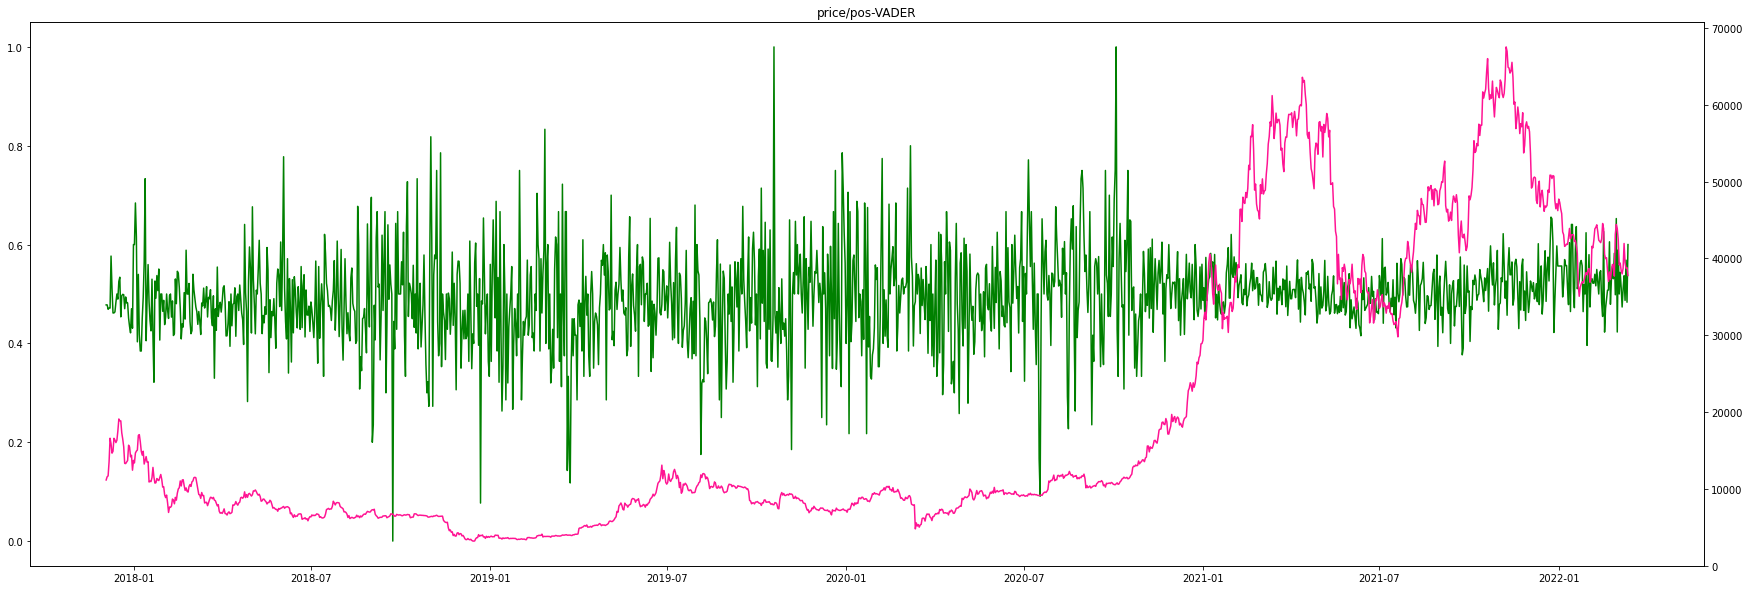

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_btc.index
y1 = sent_btc.pos
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos-VADER')
plt.show()

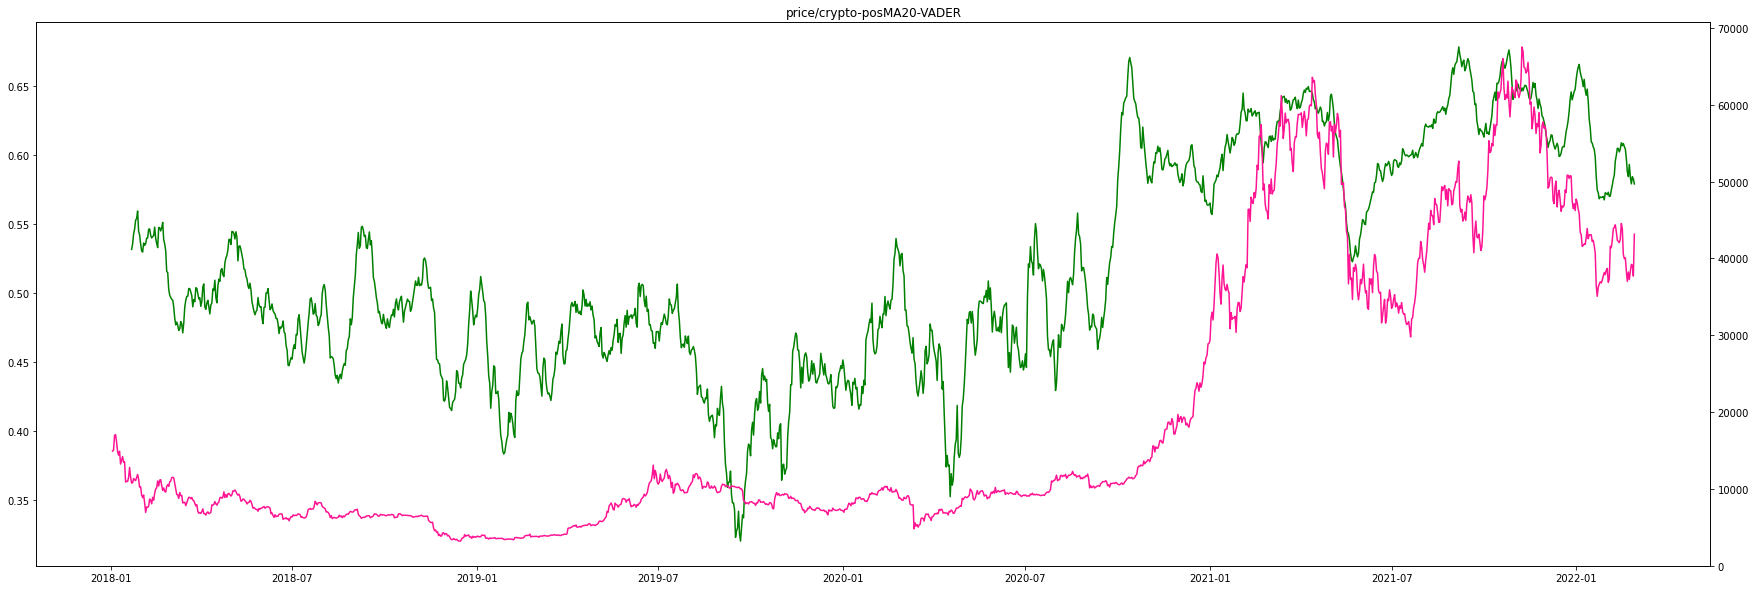

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_crypto_top.index
y1 = sent_crypto_top.pos.rolling(window=20, min_periods=20).mean()
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/crypto-posMA20-VADER')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_crypto_top.index
y1 = sent_crypto_top.pos
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/crypto-pos-VADER')
plt.show()

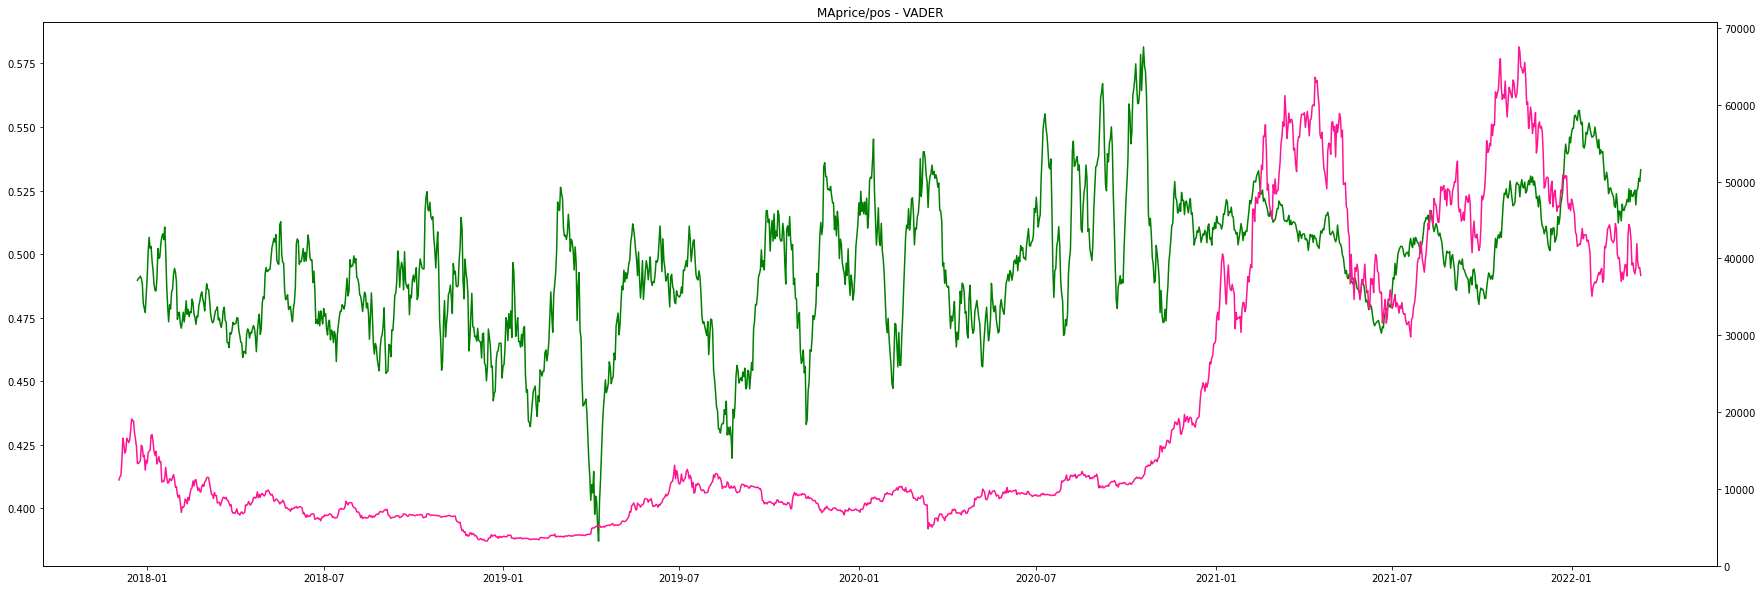

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_btc.index
y1 = sent_btc.pos.rolling(window=20, min_periods=20).mean()
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('MAprice/pos - VADER')
plt.show()

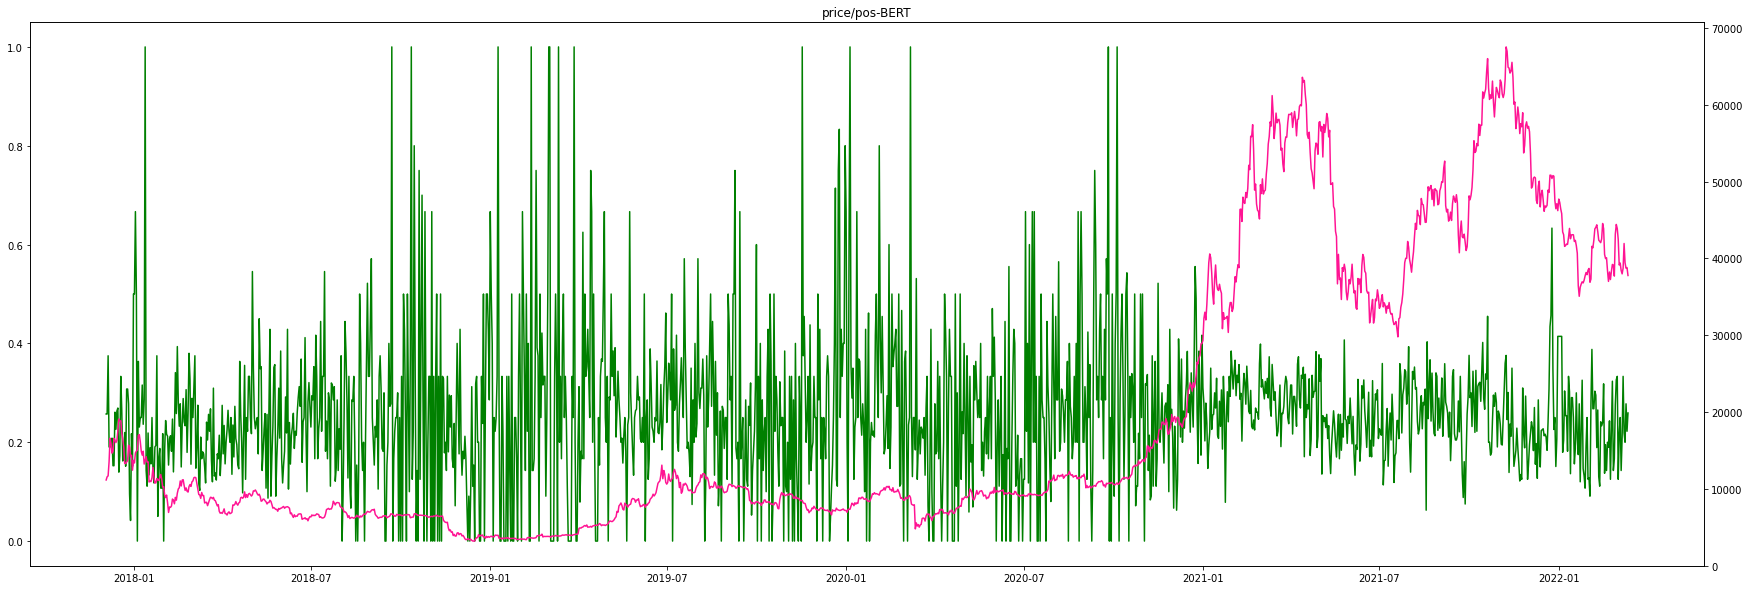

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_bert_btc_top.index
y1 = sent_bert_btc_top.pos
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos-BERT')
plt.show()

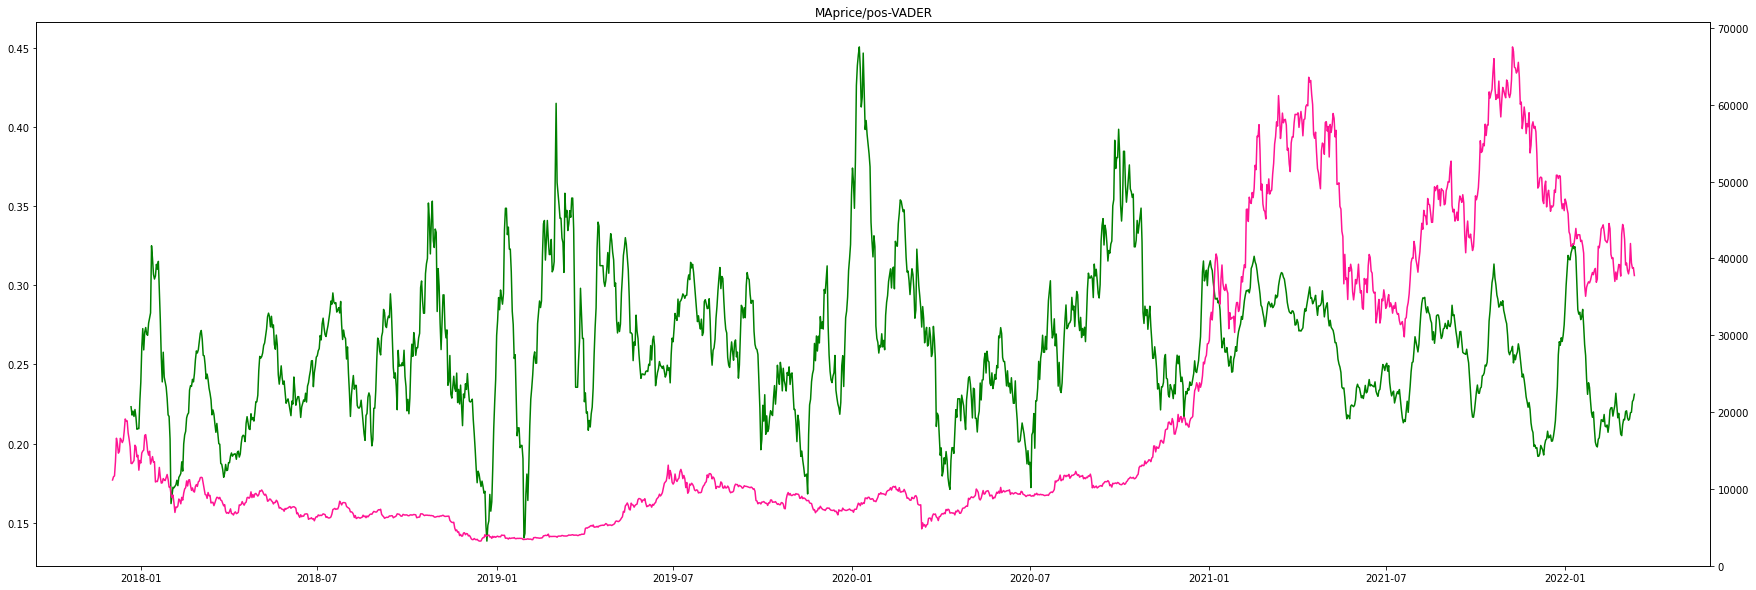

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = sent_bert_btc_top.index
y1 = sent_bert_btc_top.pos.rolling(window=20, min_periods=20).mean()
y2 = hist['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('MAprice/pos - BERT')
plt.show()

## Correlation

In [ ]:
print('VADER-BERT',np.corrcoef(sent_bert_btc_top['pos'], sent_btc_top['pos'])[0,1])

NameError: ignored

In [ ]:
# sent_bert_btc_top['diff'] = sent_bert_btc_top.pos - sent_bert_btc_top.pos.shift(1)
# sent_bert_btc_top.fillna(0, inplace = True)
# sent_bert_btc_top

# sent_btc_top['diff'] = sent_btc_top.pos - sent_btc_top.pos.shift(1)
# sent_btc_top.fillna(0, inplace = True)
# sent_btc['diff'] = sent_btc.pos - sent_btc.pos.shift(1)
# sent_btc.fillna(0, inplace = True)
# sent_btc_second['diff'] = sent_btc_second.pos - sent_btc_second.pos.shift(1)
# sent_btc_second.fillna(0, inplace = True)

In [ ]:
#상관계수
def correlation(day, price):
  print('pos',np.corrcoef(day['pos'], price['close'])[0,1])
  print('neu',np.corrcoef(day['neu'], price['close'])[0,1])
  print('neg',np.corrcoef(day['neg'], price['close'])[0,1])
  # print('diff',np.corrcoef(day['diff'], price['close'])[0,1])
  # print('mean',np.corrcoef(day['mean'], price['close'])[0,1])
  print('긍정MA20', np.corrcoef(day.pos.rolling(window=20, min_periods=1).mean(), price['close'])[0,1])
  print('부정MA20', np.corrcoef(day.neg.rolling(window=20, min_periods=1).mean(), price['close'])[0,1])
  # print('meanMA20', np.corrcoef(day['mean'].rolling(window=20, min_periods=1).mean(), price['close'])[0,1])

In [ ]:
sent_btc = sent_btc.fillna(0)
# sent_bert_btc = sent_bert_btc.fillna(0)
sent_bert_btc_top = sent_bert_btc_top.fillna(0)

NameError: ignored

In [ ]:
# print('----BERT------------')
# print('----top comments + second comments----')
# # correlation(sent_bert_btc, hist)
# print('----top comments----')
# correlation(sent_bert_btc_top, hist)
print('----VADER BTC------------')
print('----top comments + second comments----')
correlation(sent_btc, hist)
print('----top comments----')
correlation(sent_btc_top, hist)
print('----second comments----')
correlation(sent_btc_second, hist)
print('VADER Crypto')
correlation(sent_crypto_top, hist)


----VADER BTC------------
----top comments + second comments----
pos 0.1217586065602033
neu -0.09305257780861045
neg -0.032210897621238244
긍정MA20 0.4004252528503028
부정MA20 -0.11043590739234024
----top comments----
pos 0.1377579773743431
neu -0.09029021267302322
neg -0.06293904441409946
긍정MA20 0.4698642117238885
부정MA20 -0.2242322489435465
----second comments----
pos 0.060248138286752385
neu -0.0677708050437998
neg 0.023142404404955696
긍정MA20 0.22133932749522914
부정MA20 0.06658436602798955
VADER Crypto
pos 0.49616289341030734
neu -0.3425166990289324
neg -0.2722034227285063
긍정MA20 0.8210155453818252
부정MA20 -0.6098197716712362


In [ ]:
# bitcoin_stats = tfdv.generate_statistics_from_dataframe(day)
# crypto_stats = tfdv.generate_statistics_from_dataframe(df2)

In [ ]:
# # Compare training with evaluation
# tfdv.visualize_statistics(
#     lhs_statistics=bitcoin_stats, 
#     rhs_statistics=crypto_stats, 
#     lhs_name='bitcoin_sets', 
#     rhs_name='crypto_sets'
# )

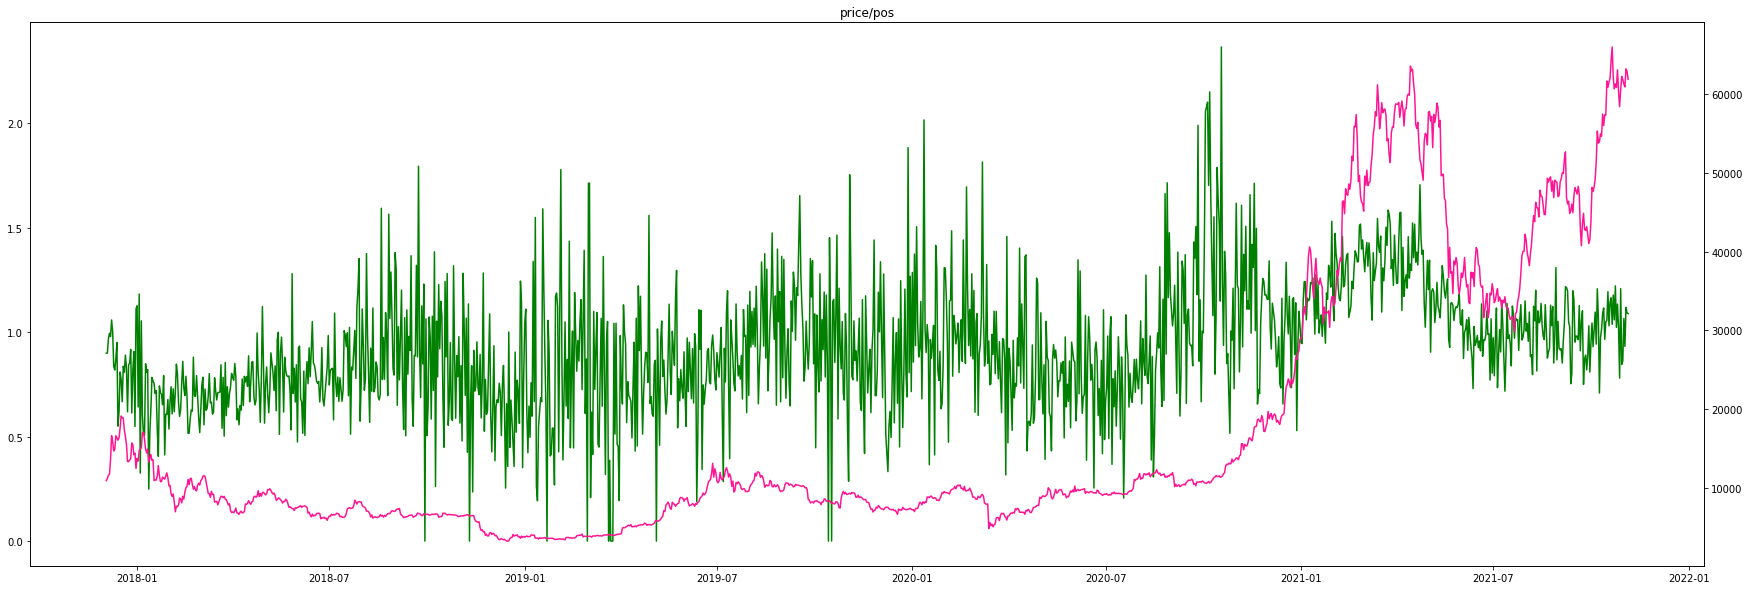

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.pos/(day.neg*2).rolling(window=60, min_periods=1).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/neg')
plt.show()

In [ ]:
print('긍정',np.corrcoef(day['pos'], price['fluct'])[0,1])
print('중립',np.corrcoef(day['neu'], price['fluct'])[0,1])
print('부정',np.corrcoef(day['neg'], price['fluct'])[0,1])
print('긍정-부정*2',np.corrcoef(day['pos-neg'], price['fluct'])[0,1])
print('긍정MA5', np.corrcoef(day.pos.rolling(window=5, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA5', np.corrcoef(day.neg.rolling(window=5, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA20', np.corrcoef(day.pos.rolling(window=20, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA20', np.corrcoef(day.neg.rolling(window=20, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA60', np.corrcoef(day.pos.rolling(window=60, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA60', np.corrcoef(day.neg.rolling(window=60, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA200', np.corrcoef(day.pos.rolling(window=200, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA200', np.corrcoef(day.neg.rolling(window=200, min_periods=1).mean(), price['fluct'])[0,1])

긍정 -0.012327952601845112
중립 0.01771697181008595
부정 -0.0017835128562533715
긍정-부정*2 -0.0035734517094258254
긍정MA5 0.02960061716382623
부정MA5 -0.044214006116125096
긍정MA20 0.014110661806779631
부정MA20 -0.04084994767024763
긍정MA60 0.022855958125468274
부정MA60 -0.025806461402768006
긍정MA200 0.03117419475866923
부정MA200 -0.030159614305987313
